In [170]:
# Import related packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Data id:14--28--14 

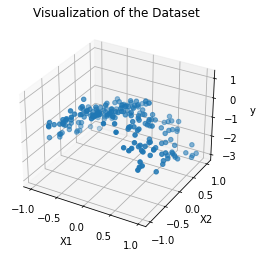

In [32]:
# Question 1
# (a)
# Load the data
file = open("week3.txt", "r")
data = [line.strip() for line in file.readlines()]
data = [line.split(",") for line in data]

# Convert to numpy array
data = np.array(data).astype(float)

# Capture the Xs and ys
X = data[:, :2]
y = data[:, 2]

# Plot the graph
fig = plt.figure()
ax = fig.add_subplot(111 , projection ='3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.set_title("Visualization of the Dataset")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.show()

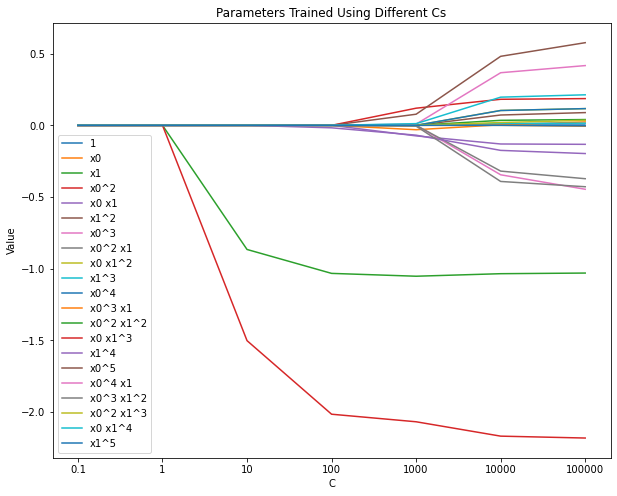

In [72]:
# (b)
# Create new features
poly = PolynomialFeatures(5)
poly_X = poly.fit_transform(X)
names = poly.get_feature_names()

# Train a list of models
parameters = []
c_list = [0.1, 1, 10, 100, 1000, 10000, 100000]
for c in c_list:
    # Transfer c to alpha
    alpha = 1/(2*c)
    clf = linear_model.Lasso(random_state=0, alpha=alpha)
    clf.fit(poly_X, y)
    parameters.append(clf.coef_)
    
parameters = np.array(parameters).T

# Visualization
plt.figure(figsize=[10, 8])
plt.title("Parameters Trained Using Different Cs")
for i in range(len(parameters)):
    plt.plot(np.arange(len(c_list)), parameters[i], label=names[i])
plt.xlabel("C")
plt.xticks(np.arange(len(c_list)), c_list)
plt.ylabel("Value")
plt.legend()
plt.show()

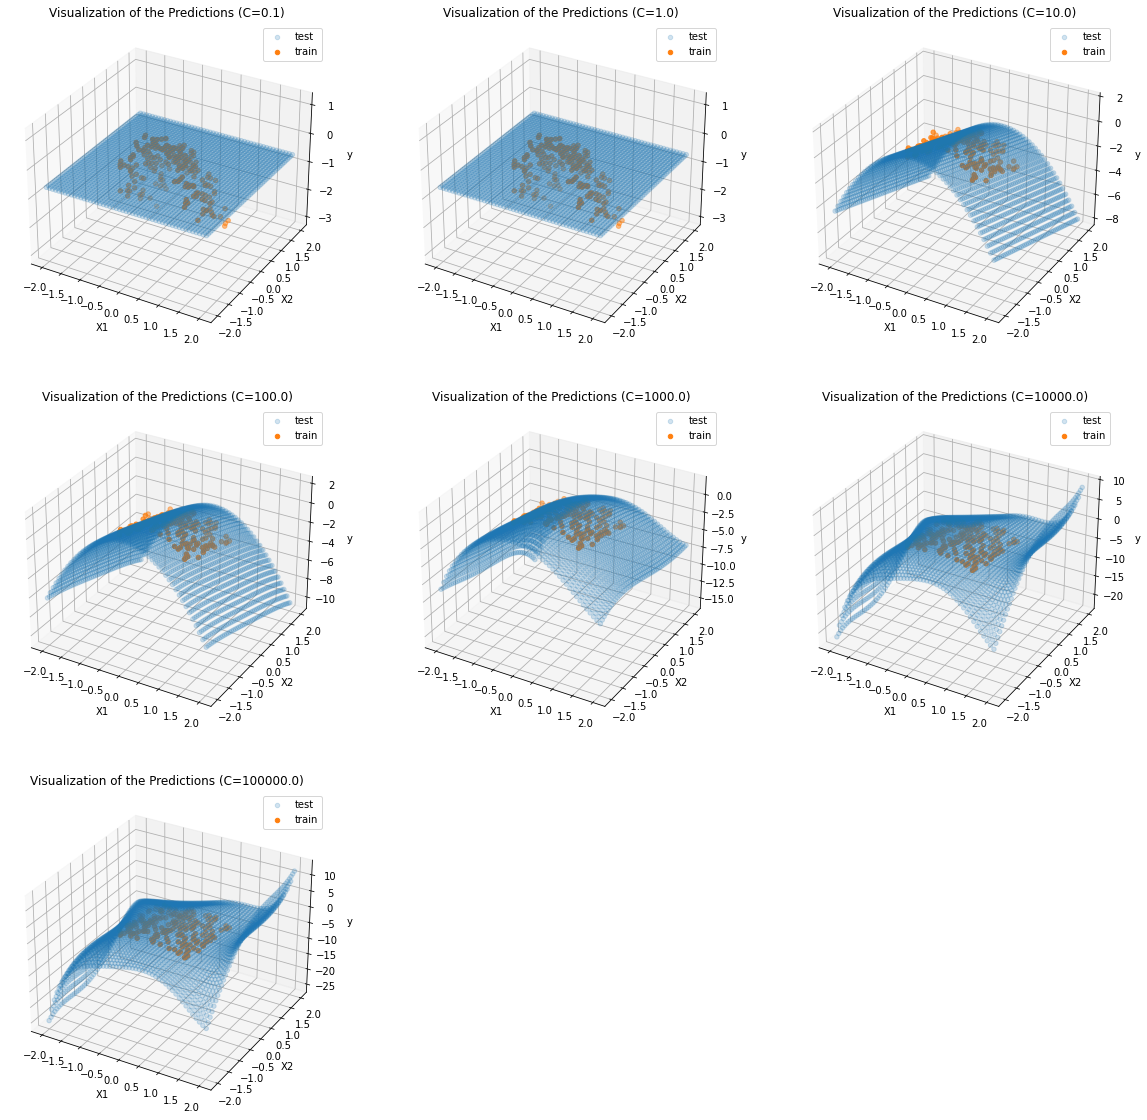

In [102]:
# (c)
# Generate a grid
Xtest =[ ]
grid =np.linspace(-2, 2)
for i in grid:
    for j in grid:
        Xtest.append([i, j])
Xtest = np.array(Xtest)

# Generate the polynomial features
poly_Xtest = poly.fit_transform(Xtest)

# Train a list of models and make predictions
c_list = [0.1, 1, 10, 100, 1000, 10000, 100000]
predictions = []
for c in c_list:
    # Transfer c to alpha
    alpha = 1/(2*c)
    clf = linear_model.Lasso(random_state=0, alpha=alpha)
    clf.fit(poly_X, y)
    predictions.append(clf.predict(poly_Xtest))

# Generate the graphs
fig = plt.figure(figsize=[20, 20])
for i in range(len(c_list)):
    ax = fig.add_subplot(3, 3, i+1, projection ='3d')
    # Predictions
    ax.scatter(Xtest[:, 0], Xtest[:, 1], predictions[i], alpha=0.2, label="test")
    # Training samples
    ax.scatter(X[:, 0], X[:, 1], y, label="train")
    ax.set_title("Visualization of the Predictions (C=%.1f)"%c_list[i])
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("y")
    plt.legend()
plt.show()

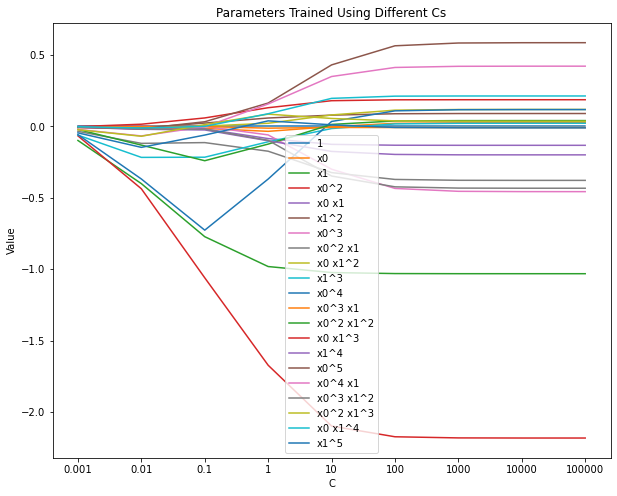

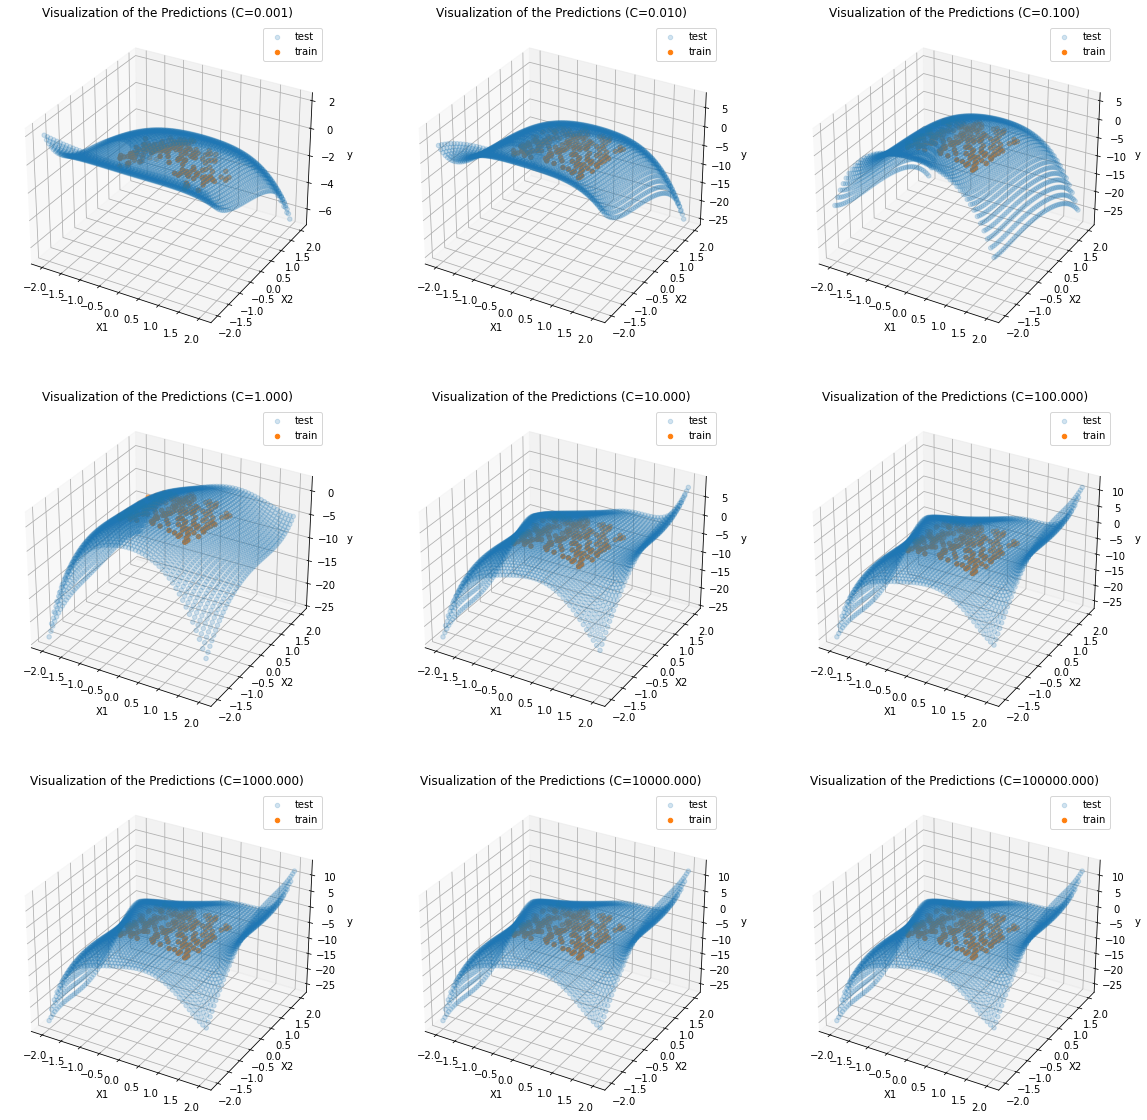

In [109]:
# (e)
# Train a list of models, capture the parameters and predictions
parameters = []
predictions = []
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for c in c_list:
    # Transfer c to alpha
    alpha = 1/(2*c)
    clf = linear_model.Ridge(random_state=0, alpha=alpha)
    clf.fit(poly_X, y)
    parameters.append(clf.coef_)
    predictions.append(clf.predict(poly_Xtest))
    
parameters = np.array(parameters).T

# Visualization (parameters)
plt.figure(figsize=[10, 8])
plt.title("Parameters Trained Using Different Cs")
for i in range(len(parameters)):
    plt.plot(np.arange(len(c_list)), parameters[i], label=names[i])
plt.xlabel("C")
plt.xticks(np.arange(len(c_list)), c_list)
plt.ylabel("Value")
plt.legend()
plt.show()

# Generate the graphs (predictions)
fig = plt.figure(figsize=[20, 20])
for i in range(len(c_list)):
    ax = fig.add_subplot(3, 3, i+1, projection ='3d')
    # Predictions
    ax.scatter(Xtest[:, 0], Xtest[:, 1], predictions[i], alpha=0.2, label="test")
    # Training samples
    ax.scatter(X[:, 0], X[:, 1], y, label="train")
    ax.set_title("Visualization of the Predictions (C=%.3f)"%c_list[i])
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("y")
    plt.legend()
plt.show()

D:\Anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022068311193891077, tolerance: 0.011123288615514683
  positive)


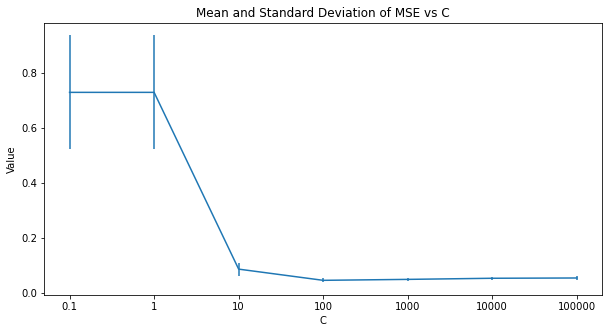

In [171]:
# Question 2
# (a)
# A list of C
c_list = [0.1, 1, 10, 100, 1000, 10000, 100000]

# Create k folds
kf = KFold(5, shuffle=True, random_state=0)
datasets = [dataset for dataset in kf.split(poly_X)]

# Test on different Cs
means = []
stds = []
for c in c_list:
    alpha = 1/(2*c)
    model = linear_model.Lasso(random_state=0, alpha=alpha)
    errors = []
    for [train_indices, test_indices] in datasets:
        # Fit the model
        model.fit(poly_X[train_indices], y[train_indices])
        # Make predictions
        ypred = model.predict(poly_X[test_indices])
        # Calculate MSE
        errors.append(mean_squared_error(y[test_indices], ypred))
    means.append(np.array(errors).mean())
    stds.append(np.array(errors).std())
    
# Plot the graph
plt.figure(figsize=[10, 5])
plt.errorbar(np.arange(len(c_list)), means, stds)
plt.xticks(np.arange(len(c_list)), c_list)
plt.xlabel("C")
plt.ylabel("Value")
plt.title("Mean and Standard Deviation of MSE vs C")
plt.show()

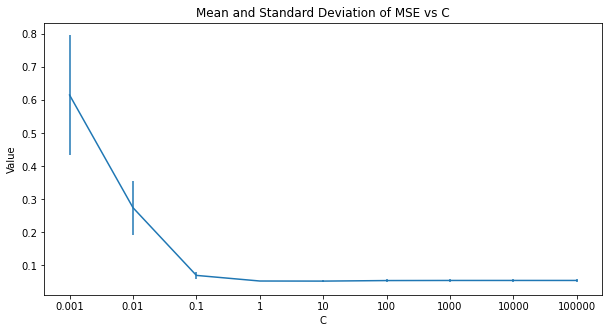

In [173]:
# (c)
# A list of C
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

# Create k folds
kf = KFold(5, shuffle=True, random_state=0)
datasets = [dataset for dataset in kf.split(poly_X)]

# Test on different Cs
means = []
stds = []
for c in c_list:
    alpha = 1/(2*c)
    model = linear_model.Ridge(random_state=0, alpha=alpha)
    errors = []
    for [train_indices, test_indices] in datasets:
        # Fit the model
        model.fit(poly_X[train_indices], y[train_indices])
        # Make predictions
        ypred = model.predict(poly_X[test_indices])
        # Calculate MSE
        errors.append(mean_squared_error(y[test_indices], ypred))
    means.append(np.array(errors).mean())
    stds.append(np.array(errors).std())
    
# Plot the graph
plt.figure(figsize=[10, 5])
plt.errorbar(np.arange(len(c_list)), means, stds)
plt.xticks(np.arange(len(c_list)), c_list)
plt.xlabel("C")
plt.ylabel("Value")
plt.title("Mean and Standard Deviation of MSE vs C")
plt.show()